In [1]:
import Stripeline as Sl
using Healpix
using PrmMaps
using Plots

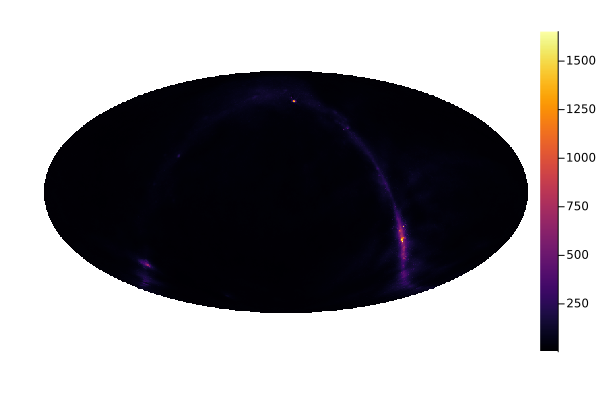

In [2]:
signal = readMapFromFITS("../input_maps/map_40GHz.fits", 1, Float64)
plot(signal)

In [ ]:
days_of_observation = 2.
fsampl_hz = 59.
NSIDE = 512

total_time_s = days_of_observation * 24 * 3600
τ_s = 1. / fsampl_hz
times = 0:τ_s:total_time_s

pixel_index = Array{Int}(undef, length(times))
map_ideal = makeMap(cam_ang, telescope_ang_ideal, times, τ_s, signal, NSIDE)

nothing

In [24]:
# We simulate the I0 horn that point towards [0.0,0.0,1.0]
cam_ang = Sl.CameraAngles()

telescope_ang_ideal = Sl.TelescopeAngles()

wheel2ang = deg2rad.([10.0,20.0])
wheel3ang = deg2rad.([10.0])

nothing

In [32]:
map_nonideal_wheel2 = [makeMap(cam_ang, Sl.TelescopeAngles(wheel2ang_0_rad = i), times, τ_s, signal, NSIDE) for i in wheel2ang]
p_wheel2 = [plot((map-map_ideal)/map) for map in map_nonideal_wheel2]

nothing

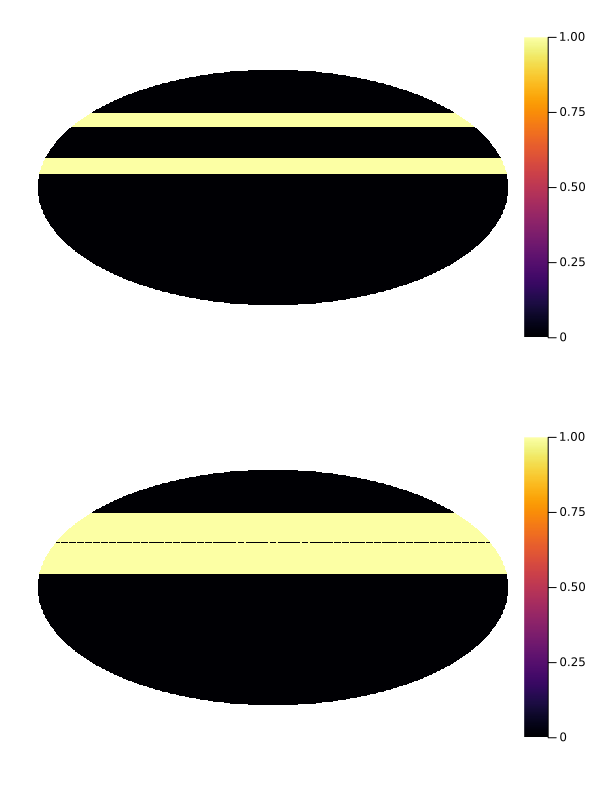

In [37]:
plot(p_wheel2..., layout = (length(p_wheel2), 1),size = (600, 400*length(p_wheel2)))